In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This notebook is going to help me investigate and make changes to the app. I want to fill in empty values with means and see what other tweaks I need to make. 

In [2]:
df = pd.read_csv('vehicles_us.csv')

In [3]:
df.duplicated().sum()

0

In [4]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


I see that the items are separated by _. I want them to be separated by a space. 

In [5]:
df['model'] = df['model'].str.replace(' ', '_')

In [6]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw_x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford_f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai_sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford_f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler_200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Much better to look at. 

In [7]:
model = df['model'].unique()
model

array(['bmw_x5', 'ford_f-150', 'hyundai_sonata', 'chrysler_200',
       'chrysler_300', 'toyota_camry', 'honda_pilot', 'kia_sorento',
       'chevrolet_silverado_1500', 'honda_accord', 'ram_1500',
       'gmc_yukon', 'jeep_cherokee', 'chevrolet_traverse',
       'hyundai_elantra', 'chevrolet_tahoe', 'toyota_rav4',
       'chevrolet_silverado', 'jeep_wrangler', 'chevrolet_malibu',
       'ford_fusion_se', 'chevrolet_impala', 'chevrolet_corvette',
       'jeep_liberty', 'toyota_camry_le', 'nissan_altima',
       'subaru_outback', 'toyota_highlander', 'dodge_charger',
       'toyota_tacoma', 'chevrolet_equinox', 'nissan_rogue',
       'mercedes-benz_benze_sprinter_2500', 'honda_cr-v',
       'jeep_grand_cherokee', 'toyota_4runner', 'ford_focus',
       'honda_civic', 'kia_soul', 'chevrolet_colorado',
       'ford_f150_supercrew_cab_xlt', 'chevrolet_camaro_lt_coupe_2d',
       'chevrolet_cruze', 'ford_mustang', 'chevrolet_silverado_3500hd',
       'nissan_frontier_crew_cab_sv', 'subaru_imp

Trying to see the unique models names. 

In [8]:
df['model_year'].min()

1908.0

Seeing what the minimum year is.

In [9]:
df['model_year'].max()

2019.0

Seeing what the maximum year is. 

In [10]:
min_year, max_year = int(df['model_year'].min()), int(df['model_year'].max())

Assigning these variables and printing them after so I can see if the assignments worked the way I wanted them to. 

In [11]:
min_year, max_year



(1908, 2019)

In [12]:
df.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed'],
      dtype='object')

I wanted to see the columns to make sure I'm referencing them correctly. 

In [13]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['paint_color'] = df['paint_color'].fillna('Unknown')
df['model_year'] = df['model_year'].fillna(df.groupby(['model'])['model_year'].transform('median'))
df['odometer'] = df['odometer'].fillna(df.groupby(['model'])['odometer'].transform('median'))
df['cylinders'] = df['cylinders'].fillna(df.groupby(['model'])['cylinders'].transform('median'))

The missing values in this column for is_4wd are filled with 0, assuming these vehicles are not 4WD. I filled in the empty values for paint_color as Unknown to show that we don't know the exact paint color. The missing values in the model_year, odometer, and cylinders columns are filled with the median because they are expected to be closely tied to the unique vehicle model. 

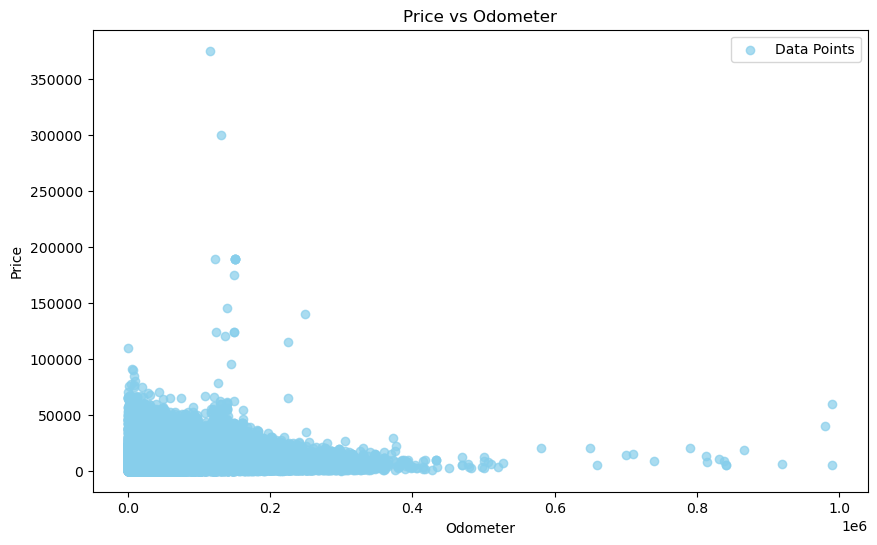

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.7, color='skyblue', label='Data Points')
plt.title('Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.legend()
plt.show()

We can see that the lower the odometer reading, the higher the price of the vehicle. We can also see that the prices start to decrease the higher the odometer readings get. We do see a few outliers in the data, but the overall trend is decreasing price as the odometer reading increases. 

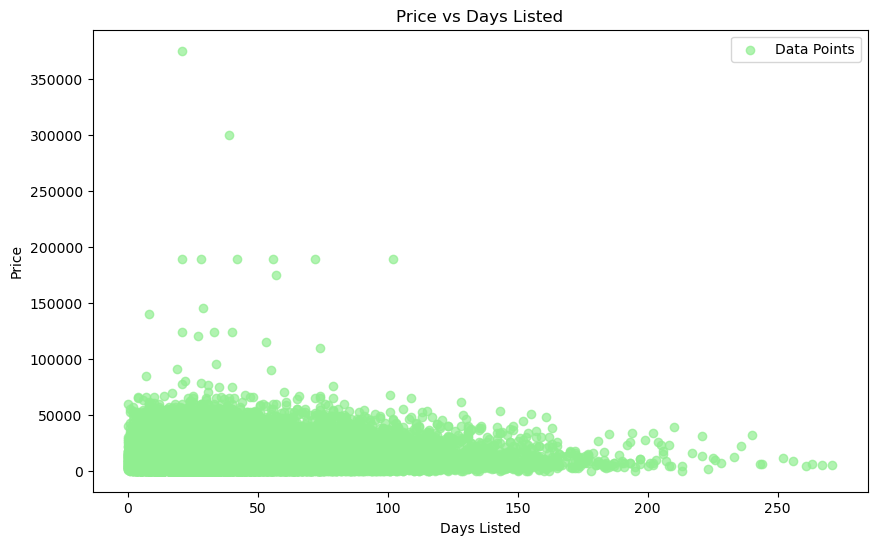

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['days_listed'], df['price'], alpha=0.7, color='lightgreen', label='Data Points')
plt.title('Price vs Days Listed')
plt.xlabel('Days Listed')
plt.ylabel('Price')
plt.legend()
plt.show()

Here we see that prices don't start to decrease significantly as the days listed increases. We don't start to see a decrease until around the 100 days listed mark. This could imply price stability in the first 100 days, the owner of the lot can keep the same price for the vehicle. The decrease after this time could imply that the owner of the car lot has to keep up with the market conditions and lower prices as the cars depreciate on the lot. 

CONCLUSION: 
The data visualizations show us that the used car lot data set follow a lot of the same trends as a real-life used car lot. Odometer readings are a good indicator of vehicle usage, which is something the customer will tend to pay attention to when purchasing a vehcile from this used car lot. The owner of a used car lot might want to look into doing flash sales of vehciles with the longest listing times and the highest odometer readings to push them out the lot- they are costing the lot money! 